In [1]:
from PDEFind_class_online import PDE_Findclass

import time, glob

import numpy as np
import matplotlib.pyplot as plt
import os
import pdb

from model_selection_IP3 import ODE_sim,learned_RHS_ODE_SIR
from PDE_FIND3 import print_pde

In [2]:
# growth, death terms
ri = 0.01
rr = ri/10

dataset = ["SIR_ABM_ri_"+str(ri)+"_rr_"+str(round(rr,3))+"_real25"]

In [3]:
#EQL Pipeline values
#Where data is stored
data_dir = "../data/"
#Additional name in filenames
comp_str = ""
model_name = ""

#percentage of training, testing points
trainPerc = 0.5
valPerc = 0.5

#degree of library
deg = 4

#Learning algorithm
algo_name = 'Lasso'

#pruning percentage
prune_level = 0.05

num_eqns = 3

#number of equations to learn
reals = 10

## Run EQL Pipeline

In [4]:
pf = PDE_Findclass(dataset,
                       comp_str,
                       model_name,
                       data_dir=data_dir,
                       reals=reals,
                       trainPerc = trainPerc,
                       valPerc = valPerc,
                       deg=deg,
                       prune_level = prune_level,
                       num_eqns=num_eqns,
                       algo_name = algo_name)

pf.train_val_ODEFind_SIR()
print("")
pf.list_common_eqns()

Running 10 SinDy Simulations to determine learned equation
library is ['S', 'S^2', 'I', 'I^2', 'IS']

Top Learned equation is:
dS/dt =  - 6e-05I^2    - 0.00443IS   
dI/dt =  - 0.00097I    + 0.00441IS   


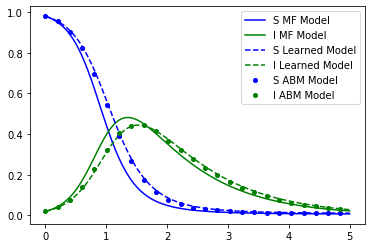

In [5]:
inferred_xis =  [pf.inferred_xi[0][0],pf.inferred_xi[1][0]]
MF_xis = [np.array([[0,0,0,0,-ri/2.0]]).T,np.array([[0,0,-rr,0,ri/2.0]]).T]
y0 = np.array((pf.S[0][0],pf.I[0][0]))

#simulate inferred, mean-field equation
y_inferred = ODE_sim(inferred_xis,learned_RHS_ODE_SIR,pf.t,y0,description=pf.description)
y_MF = ODE_sim(MF_xis,learned_RHS_ODE_SIR,pf.t,y0,description=pf.description)

#plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pf.t*rr,y_MF[0,:],"b",label = "S MF Model")
ax.plot(pf.t*rr,y_MF[1,:],"g",label = "I MF Model")
#ax.plot(pf.t*rr,1 - y_MF[0,:] - y_MF[1,:],"k",label = "R MF Model")

ax.plot(pf.t*rr,y_inferred[0,:],"b--",label = "S Learned Model")
ax.plot(pf.t*rr,y_inferred[1,:],"g--",label = "I Learned Model")
#ax.plot(pf.t*rr,1 - y_inferred[0,:] - y_inferred[1,:],"k--",label = "R Learned Model")

ax.plot(pf.t[::4]*rr,pf.S[::4],"b.",label = "S ABM Model",markersize=8)
ax.plot(pf.t[::4]*rr,pf.I[::4],"g.",label = "I ABM Model",markersize=8)
#ax.plot(pf.t[::4]*rr,1 - pf.S[::4] - pf.I[::4],"k.",label = "R ABM Model",markersize=8)

plt.legend()

## Now do the same for several rp values

Running 10 SinDy Simulations to determine learned equation
library is ['S', 'S^2', 'I', 'I^2', 'IS']
Top Learned equation is:
dS/dt =  - 4e-05I^2    - 0.00229IS   
dI/dt =  - 0.00049I    + 3e-05I^2    + 0.00225IS   
Running 10 SinDy Simulations to determine learned equation
library is ['S', 'S^2', 'I', 'I^2', 'IS']
Top Learned equation is:
dS/dt =  - 4e-05I^2    - 0.00447IS   
dI/dt =  - 0.00098I    + 0.00443IS   
Running 10 SinDy Simulations to determine learned equation
library is ['S', 'S^2', 'I', 'I^2', 'IS']
Top Learned equation is:
dS/dt =  - 0.01881IS   
dI/dt =  - 0.00472I    + 0.01833IS   
Running 10 SinDy Simulations to determine learned equation
library is ['S', 'S^2', 'I', 'I^2', 'IS']
Top Learned equation is:
dS/dt = 0.01569S    - 0.01608S^2    - 0.00545I    - 0.0459IS   
dI/dt =  - 0.00906I    + 0.03101IS   


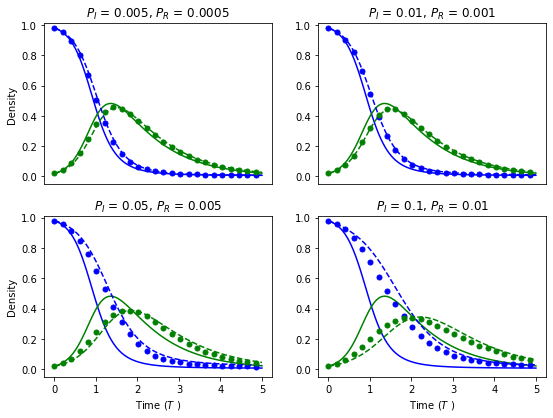

In [6]:
# Infection rates
ri_vec = [.005,0.01,.05,0.1]

fig = plt.figure(figsize=(9,6.5))
count = 1

## Initialize summary lists list of learned xi vectors
xi_learned = []
#list of mean squared error (MSE) between Mean-field model and ABM data
MF_MSE = []
#list of mean squared error (MSE) between learned model and ABM data
learned_MSE = []


for ri in ri_vec:
    
    rr = ri/10.0

    dataset = ["SIR_ABM_ri_"+str(ri)+"_rr_"+str(round(rr,3))+"_real25"]

    #EQL Pipeline
    pf = PDE_Findclass(dataset,
                       comp_str,
                       model_name,
                       data_dir=data_dir,
                       reals=reals,
                       trainPerc = trainPerc,
                       valPerc = valPerc,
                       deg=deg,
                       prune_level = prune_level,
                       num_eqns=num_eqns,
                       algo_name = algo_name)
    
    pf.train_val_ODEFind_SIR()
    pf.list_common_eqns()
    
    #simulate mean-field, learned models
    inferred_xis =  [pf.inferred_xi[0][0],pf.inferred_xi[1][0]]
    #mean-field parameters
    MF_xis = [np.array([[0,0,0,0,-ri/2.0]]).T,np.array([[0,0,-rr,0,ri/2.0]]).T]
    #initial conditions
    y0 = np.array((pf.S[0][0],pf.I[0][0]))
    y_inferred = ODE_sim(inferred_xis,learned_RHS_ODE_SIR,pf.t,y0,description=pf.description)
    y_MF = ODE_sim(MF_xis,learned_RHS_ODE_SIR,pf.t,y0,description=pf.description)

    #plot
    
    ax = fig.add_subplot(2,2,count)
    ax.plot(pf.t*rr,y_MF[0,:],"b",label="MF Model")
    ax.plot(pf.t*rr,y_MF[1,:],"g")

    ax.plot(pf.t*rr,y_inferred[0,:],"b--",label="Learned Model")
    ax.plot(pf.t*rr,y_inferred[1,:],"g--")

    ax.plot(pf.t[::4]*rr,pf.S[::4],"b.",markersize=10,label="ABM Data")
    ax.plot(pf.t[::4]*rr,pf.I[::4],"g.",markersize=10)

    ax.set_ylim(-0.05,1.01)

    #axes
    ax.set_title("$P_I$ = " +str(ri)+", $P_R$ = " +str(rr))
    
    if count > 2:
        ax.set_xlabel("Time ($T$ )")
    else:
        ax.set_xticks([])
    if count % 2 == 1:
        ax.set_ylabel("Density")

        
    # Save MSE, learned xi value    
    xi_learned.append(inferred_xis)
    MF_MSE.append([np.linalg.norm(np.squeeze(y_MF[0,:]) - pf.S[:,0])/len(pf.S),np.linalg.norm(np.squeeze(y_MF[1,:]) - pf.I[:,0])/len(pf.I)])
    learned_MSE.append([np.linalg.norm(np.squeeze(y_inferred[0,:]) - pf.S[:,0])/len(pf.S),np.linalg.norm(np.squeeze(y_inferred[1,:]) - pf.I[:,0])/len(pf.I)])
    
    
    count+=1
    
#plt.savefig("case_study_1_SIR_comparison.pdf",format="pdf")

In [8]:
##Creates table that can be copied and pasted into a LaTeX table environment.

R0_learned = [4.68,4.52,3.72,3.41]

print('\\begin{tabular}{|c|c|l|c|l|c|}')
print('    \\hline')
print('    $P_I$ & \\ $P_R$ & \\ Mean-field model (MSE) & $R_0$ & Learned model (MSE) & $R_0$ \\\\ ')
print('    \\hline')

for i,ri in enumerate(ri_vec):
    rr = ri/10.0

    learned_S = print_pde(xi_learned[i][0][:,np.newaxis],pf.description,ut="\\nicefrac{\\text{d}S}{\\text{d}t}")
    learned_I = print_pde(xi_learned[i][1][:,np.newaxis],pf.description,ut="\\nicefrac{\\text{d}I}{\\text{d}t}")
    MF_S = print_pde(np.array([-ri/2])[:,np.newaxis],["IS"],ut="\\nicefrac{\\text{d}S}{\\text{d}t}")
    MF_I = print_pde(np.array([ri/2,-rr])[:,np.newaxis],["IS","I"],ut="\\nicefrac{\\text{d}I}{\\text{d}t}")

    print("    \multirow{2}{*}{$" + str(ri) + "$} & \multirow{2}{*}{$" + str(rr) + "$}  & $" + MF_S + "$ ("+str(round(MF_MSE[i][0],4))+") & \multirow{2}{*}{5.0}  & $" + learned_S +"$ ("+str(round(learned_MSE[i][0],4))+") & \multirow{2}{*}{"+str(R0_learned[i])+"} \\\\")
    print("     & & $" + MF_I + "$ ("+str(round(MF_MSE[i][1],4))+") & & $" + learned_I +"$ ("+str(round(learned_MSE[i][1],4))+") & \\\\")
    print("    \\hline")
print('\\end{tabular}')



\begin{tabular}{|c|c|l|c|l|c|}
    \hline
    $P_I$ & \ $P_R$ & \ Mean-field model (MSE) & $R_0$ & Learned model (MSE) & $R_0$ \\ 
    \hline
    \multirow{2}{*}{$0.005$} & \multirow{2}{*}{$0.0005$}  & $\nicefrac{\text{d}S}{\text{d}t} =  - 0.0025IS   $ (0.0027) & \multirow{2}{*}{5.0}  & $\nicefrac{\text{d}S}{\text{d}t} =  - 4e-05I^2    - 0.00229IS   $ (0.0012) & \multirow{2}{*}{4.68} \\
     & & $\nicefrac{\text{d}I}{\text{d}t} = 0.0025IS    - 0.0005I   $ (0.002) & & $\nicefrac{\text{d}I}{\text{d}t} =  - 0.00049I    + 3e-05I^2    + 0.00225IS   $ (0.0009) & \\
    \hline
    \multirow{2}{*}{$0.01$} & \multirow{2}{*}{$0.001$}  & $\nicefrac{\text{d}S}{\text{d}t} =  - 0.005IS   $ (0.0044) & \multirow{2}{*}{5.0}  & $\nicefrac{\text{d}S}{\text{d}t} =  - 4e-05I^2    - 0.00447IS   $ (0.0006) & \multirow{2}{*}{4.52} \\
     & & $\nicefrac{\text{d}I}{\text{d}t} = 0.005IS    - 0.001I   $ (0.0029) & & $\nicefrac{\text{d}I}{\text{d}t} =  - 0.00098I    + 0.00443IS   $ (0.0005) & \\
    \hline
    \m